In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset

In [9]:
# Our dataset is a feather file 

In [ ]:
# Feather is a binary file format that is used for storing data .. Feather is a fast, lightweight, and easy-to-use binary file format for storing data.It shows high I/O speed, doesn’t take too much memory on the disk and doesn’t need any unpacking when loaded back into RAM. Feather has max I/O speed

In [13]:
pip install pyarrow

In [15]:
all_data = pd.read_feather(r"C:\Users\MANZOOR\Downloads/sales_data.ftr")

In [17]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# DATA CLEANING AND FORMATTING

In [19]:
all_data.isnull().sum() ## checking out total missing values we have

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [23]:
### since there 545 observations where entire row have missing value , we can drop these 545 rows..

all_data = all_data.dropna(how="all")

In [25]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
### check whether we have duplicate rows or not !

In [27]:
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [29]:
all_data[all_data.duplicated()] ## total 618 duplicate rows ..

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [31]:
all_data = all_data.drop_duplicates() ## Dropping all the duplicate rows ..

In [33]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## 2. WHICH IS THE BEST MONTH FOR SALE ?

In [ ]:
## Lets checks the data type 

In [37]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
## change order-date data type to datetime

In [39]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

C:\Users\MANZOOR\AppData\Local\Temp\ipykernel_27204\4061391744.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


In [41]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [ ]:
## Now we need extract month from the order date

In [45]:
all_data['Month'] = all_data['Order Date'].dt.month_name()

In [47]:
all_data['Month'] = all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'April'

In [49]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [ ]:
# Change the data type of Quantity ordered and Price Each

In [51]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

In [53]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
dtype: object

In [55]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [57]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


In [77]:
monthly_sales = all_data.groupby('Month').sum(numeric_only=True)['Sales']

month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_sales = monthly_sales.reindex(month_order)

In [79]:
best_month = monthly_sales.sort_values(ascending=False)

In [81]:
print(best_month)

Month
December     4608295.70
October      3734777.86
April        3389217.98
November     3197875.05
May          3150616.23
March        2804973.35
July         2646461.32
June         2576280.15
August       2241083.37
February     2200078.08
September    2094465.69
January      1821413.16
Name: Sales, dtype: float64


In [ ]:
# Bar Chart for Visualisation

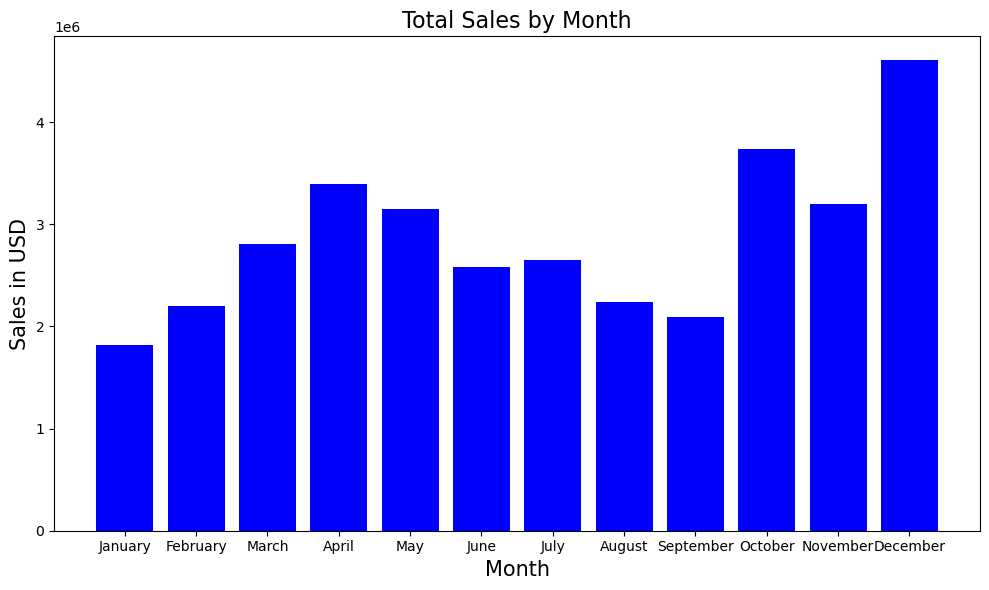

In [87]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(monthly_sales.index, monthly_sales.values, color='blue')

# Set the title and labels for the chart
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales in USD', fontsize=15)
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

## 3.WHICH CITY HAS MAXIMUM ORDER ?

In [89]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


In [91]:
print("Missing values in Month column:", all_data['Month'].isnull().sum())

Missing values in Month column: 1


In [93]:
all_data.dropna(subset=['Month'], inplace=True)

In [95]:
print("Missing values in Month column:", all_data['Month'].isnull().sum())

Missing values in Month column: 0


In [97]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [ ]:
## Need to extract the city name from the address

In [99]:
#all_data['Purchase Address'][0].split(',')[1] ## extracting city from "Purchase Address"

' Dallas'

In [113]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [115]:
all_data['City']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

In [117]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,Los Angeles


In [119]:
pd.value_counts(all_data['city'])

C:\Users\MANZOOR\AppData\Local\Temp\ipykernel_27204\2119930960.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(all_data['city'])


city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

In [133]:
City_Sales = all_data.groupby('City').sum(numeric_only=True)['Sales']

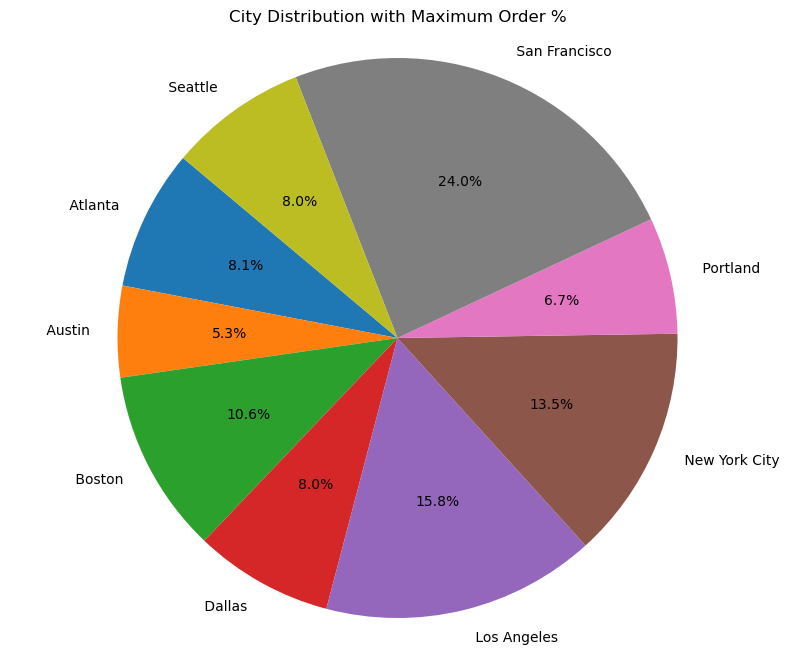

In [145]:
plt.figure(figsize=(10, 8))  # Set figure size
plt.pie(City_Sales, labels=City_Sales.index, autopct='%1.1f%%', startangle=140)
plt.title('City Distribution with Maximum Order %')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [ ]:
## New York , Los Angeles , San Francisco are the Top 3 cities which has max order 

# What products are most often sold together ?

In [147]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,Los Angeles


In [149]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city', 'City'],
      dtype='object')

In [ ]:
 ## dataframe in which we have those Order Ids who have purchased more products !

In [151]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [153]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,Los Angeles
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles,Los Angeles
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco,San Francisco
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta,Atlanta
186803,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta,Atlanta
186804,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta,Atlanta
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco,San Francisco


In [155]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

In [157]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [161]:
dup_products_df = df_duplicated.merge(dup_products , how='left' , on='Order ID') ## merge dataframes 

In [163]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City,grouped_products
0,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco,San Francisco,"Google Phone,USB-C Charging Cable"


In [165]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID']) # lets drop out all duplicate Order ID

In [167]:
no_dup_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City,grouped_products
0,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,14.95,New York City,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1.0,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",April,150.00,Seattle,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1.0,700.00,2019-09-28 13:07:00,"795 Willow St, New York City, NY 10001",September,700.00,New York City,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1.0,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",September,700.00,Boston,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1.0,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,379.99,Atlanta,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


<Axes: ylabel='count'>

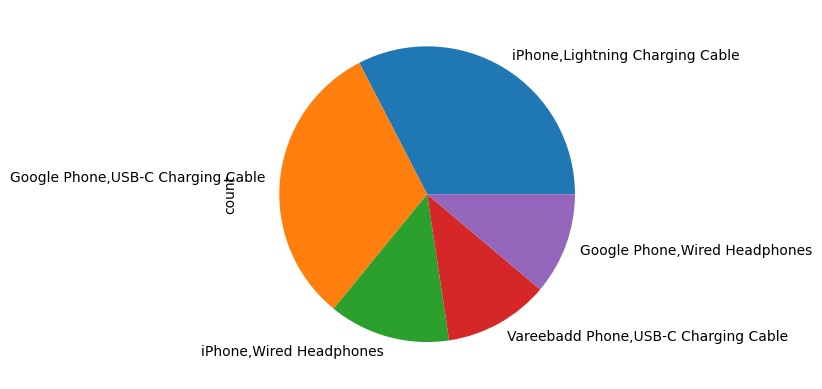

In [183]:
no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()

In [ ]:
## ie as soon as any Person will bought Iphone , we can recommend him charging cable , wired headphones 
## ie as soon as any Person will bought Google phone , we can recommend him USB-c charging cable


## This is a very important insight if someone is building recommendation system ..